# Evaluación  (Módulo 2)
> El tema principal en este módulo fueron simulaciones Montecarlo. Al finalizar este módulo, se espera que ustedes hayan desarrollado las siguientes competencias y habilidades:
> - Evaluar integrales (o encontrar áreas) numéricamente mendiante métodos Montecarlo.
> - Realizar evaluaciones de probabilidad precio-umbral.

## 1. Evaluación numérica de integrales utilizando Montecarlo [70 pts]

- **[10 puntos]** En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales, diga cuales son y mencione sus características.

La *Integración de Montecarlo* **tipo 1** utiliza el valor promedio de la función mediante la suma de Riemann, dividiendo la región de la cual se quiere calcular el área en varios rectángulos.
En cambio, la *Integración de Montecarlo* **tipo 2** es más útil cuando se trata de regiones de las cuales no se puede describir fácilmente su geometría tales como desigualdades o polinomios de mayor grado.

#### Considere 3 de las siguientes funciones:

#### $f_1(x)=\frac {1}{\ln x}$
#### $f_2(x)=e^{e^{x}}$
#### $f_3(x)=e^{-{\frac {x^{2}}{2}}}$
#### $f_4(x)=\sqrt{1+x^{4}}$
#### $f_5(x)=\ln(\ln x)$

- **[20 puntos]** Grafique las funciones. 
- **[20 puntos]** Utilizando los dos métodos, realice la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. 
- **[10 puntos]** Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones. [Sugerencia: Hacer una tabla por cada método.]
- **[10 puntos]** ¿Se pueden ver diferencias notables en la velocidad de convergencia de los métodos?

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def montecarlo_tipo_1(f,a,b,N):
    return (b-a)/N*np.sum(f(np.random.uniform(a,b,N)))
def montecarlo_tipo_2(region,a1,b1,a2,b2,N):
    A_R=(b1-a1)*(b2-a2)
    x=np.random.uniform(a1,b1,N.astype(int))
    y=np.random.uniform(a2,b2,N.astype(int))
    return A_R*np.sum(region(x))/N

# Función 1

**Gráfica**

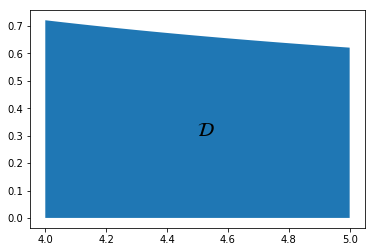

In [49]:
def función_1(x):
    return 1/np.log(x)
x=np.linspace(4,5)
y=función_1(x)
plt.fill_between(x,y)
plt.text(4.5,0.3,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [50]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 1"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 1"]=montecarlo_tipo_1(función_1,a,b,n.astype(int))
df

,Función 1
Cantidad de Términos,
10.0,0.666806
100.0,0.662876
1000.0,0.667036
10000.0,0.667491
100000.0,0.667007


**Integración de Montecarlo Tipo 2**

In [59]:
a1,a2,b1,b2=4,5,función_1(4),función_1(5)
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 1"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 1"]=montecarlo_tipo_2(función_1,a1,b1,a2,b2,n)      
df

,Función 1
Cantidad de Términos,
10.0,18.464437
100.0,25.719398
1000.0,-20.975664
10000.0,32.386403
100000.0,6.751201


# Función 2

**Gráfica**

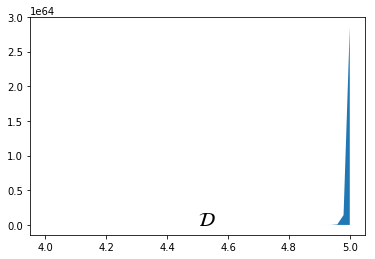

In [7]:
def función_2(x):
    return np.exp(np.exp(x))
x=np.linspace(4,5)
y=función_2(x)
plt.fill_between(x,y)
plt.text(4.5,función_2(4.5)/2,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [32]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 2"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 2"]=montecarlo_tipo_1(función_2,a,b,n.astype(int))
df

,Función 2
Cantidad de Términos,
10.0,2.845689e+62
100.0,5.817078e+62
1000.0,1.299502e+62
10000.0,1.900256e+62
100000.0,1.970489e+62


**Integración de Montecarlo Tipo 2**

# Función 3

**Gráfica**

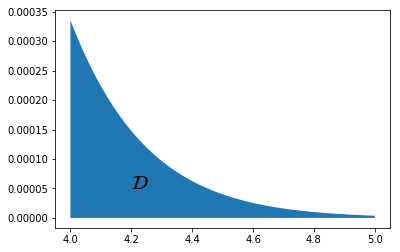

In [10]:
def función_3(x):
    return np.exp(-(x**2)/2)
x=np.linspace(4,5)
y=función_3(x)
plt.fill_between(x,y)
plt.text(4.2,0.00005,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [33]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 3"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 3"]=montecarlo_tipo_1(función_3,a,b,n.astype(int))
df

,Función 3
Cantidad de Términos,
10.0,0.000088
100.0,0.000090
1000.0,0.000079
10000.0,0.000079
100000.0,0.000078


**Integración de Montecarlo Tipo 2**

# Función 4

**Gráfica**

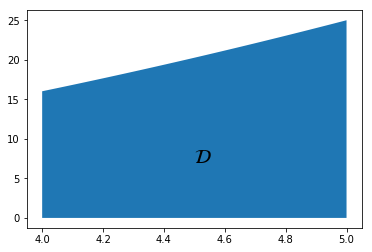

In [13]:
def función_4(x):
    return (1+x**4)**(1/2)
x=np.linspace(4,5)
y=función_4(x)
plt.fill_between(x,y)
plt.text(4.5,7,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [34]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 4"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 4"]=montecarlo_tipo_1(función_4,a,b,n.astype(int))
df

,Función 4
Cantidad de Términos,
10.0,20.952135
100.0,20.237490
1000.0,20.307459
10000.0,20.362794
100000.0,20.369063


**Integración de Montecarlo Tipo 2**

# Función 5

**Gráfica**

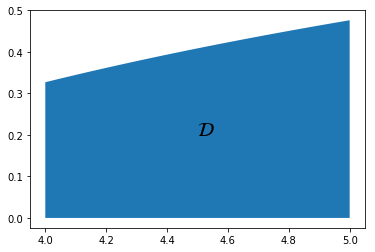

In [17]:
def función_5(x):
    return np.log(np.log(x))
x=np.linspace(4,5)
y=función_5(x)
plt.fill_between(x,y)
plt.text(4.5,0.2,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [45]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 5"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 5"]=montecarlo_tipo_1(función_5,a,b,n.astype(int))
df

,Función 5
Cantidad de Términos,
10.0,0.404354
100.0,0.412438
1000.0,0.408744
10000.0,0.405707
100000.0,0.405808


**Integración de Montecarlo Tipo 2**

## 2. Probabilidad Precio-Umbral [40 pts]
En este ejercicio se evaluarán dos compañías con tendencias más o menos similares (Apple y Microsoft)
- **[30 pts]** Determine cuál tiene más probabilidades de darnos un interés deseado.

- **[10 pts]** Además, descargue los datos del año 2017 para verificar si el análisis concuerda.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Xiuhcoatl.
</footer>